<h1 align="center">Stroke - EDA and ANN Prediction</h1>

**The notebook consists of**

1. [Importing libraries](#1)
2. [Checking for missing data](#2)
3. [Univariate Analysis](#3)
    - [Count plot for categorical variables](#4)
    - [Box plot of age](#5)
    - [Box plot of avg_glucose_level](#6)
    - [Box plot of bmi](#7)
    - [Distribution plot of age](#8)
    - [Distribution plot of avg_glucose_level](#9)
    - [Distribution plot of bmi](#10)
4. [Bivariate Analysis](#11)
    - [Correlation plot for continuous features](#12)
    - [Scatter plot for age vs avg_glucose_level with a Stroke hue](#13)
    - [Scatter plot for avg_glucose_level vs bmi with a Stroke hue](#14)
    - [Scatter plot for age vs bmi with a Stroke hue](#15)
    - [Violin plot for continuous features](#16)
    - [Pairplot of the dataset](#17)
5. [Data Preprocessing](#18)
    - [Removing the other from gender](#19)
    - [Checking the effect of outliers](#20)
    - [Removing the outliers](#21)
    - [Re-checking the distributions](#22)
    - [Handling data imbalance](#23)
6. [PyTorch Model Development](#24)
    - [Separate categorical from continuous](#25)
    - [Categorigy](#26)
    - [Stacking the columns for embeddings](#27)
    - [Setting an embedding size](#28)
    - [Defining the model](#29)
    - [Defining loss and optimizer](#30)
    - [Perform train/test split](#31)
    - [Training the model](#32)
    - [Plotting the loss function](#33)
    - [Model Validation](#34)

# 1. Imports <a id="1"></a>

In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import torch
import torch.nn as nn

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\User\Music\DL and ML Practical Tutorials - Package\Python myprojects\Stroke Analysis Pytorch\healthcare-dataset-stroke-data.csv')

In [4]:
print(df.shape)
df.head()

(5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

**The feature list and the target variable:**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Dropping the *id* column as it's just an identifier**

In [5]:
df.drop(['id'],axis=1,inplace=True)

# 2. Checking for missing data <a id="2"></a>

In [6]:
#count of missing data
missing_values_count = df.isna().sum()

#find the percentage of missing data
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
print("Percentage of missing data from the dataset is : {}%".format(percent_missing))

Percentage of missing data from the dataset is : 0.35758761786159043%


**Plotting a heatmap to check for missing data features**

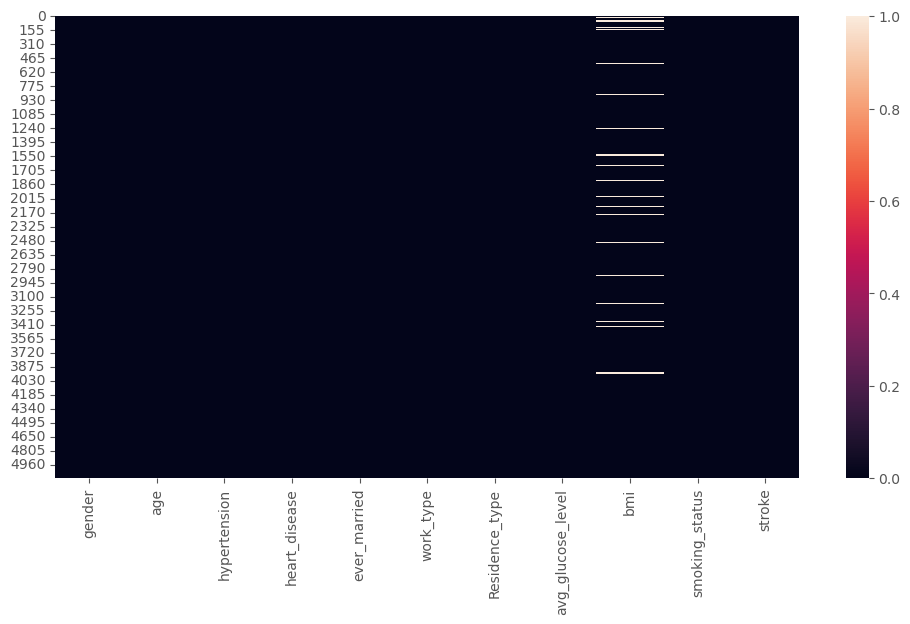

In [7]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull())
plt.show()

**Filling the missing data in *bmi* column with mean**

In [8]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# 3. Univariate analysis <a id="3"></a>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Making different arrays for categorical and continuous features**

In [10]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
cont_cols = ["age","avg_glucose_level","bmi"]

### Count Plot of Categorical features <a id="4"></a>

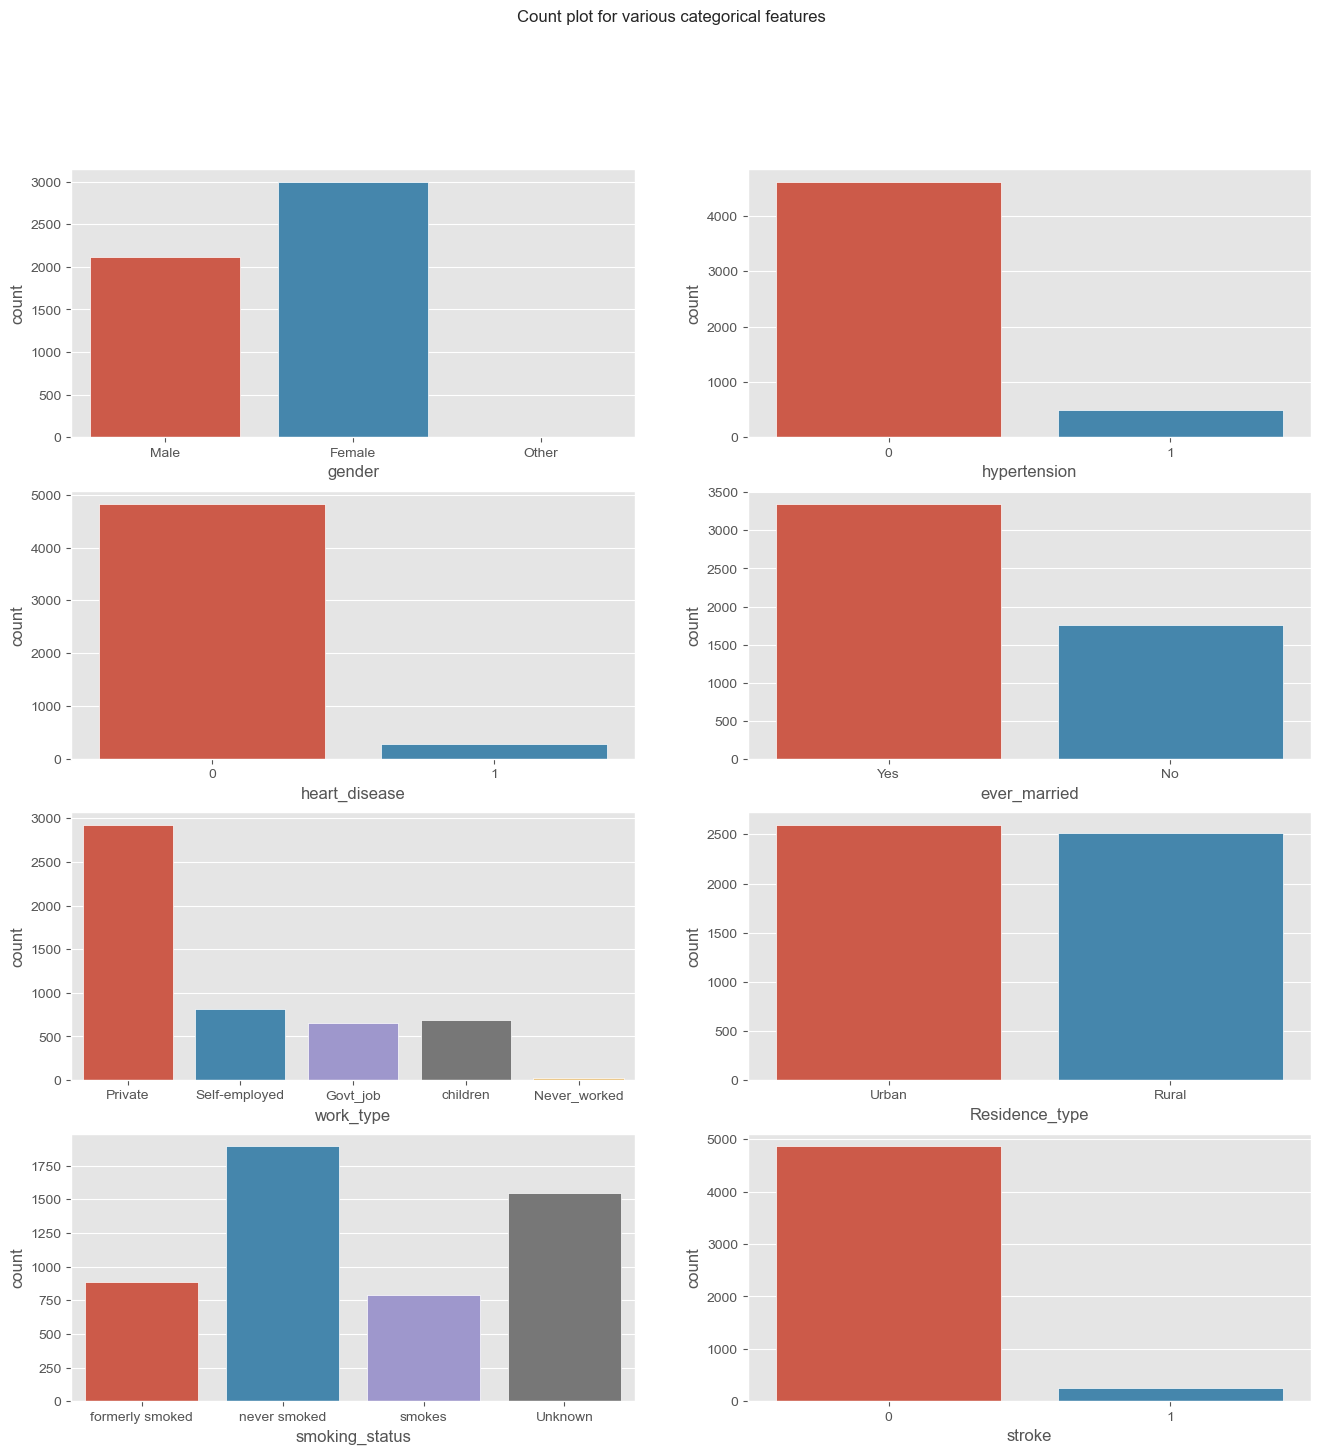

In [11]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

### Box Plot of *age* <a id="5"></a>

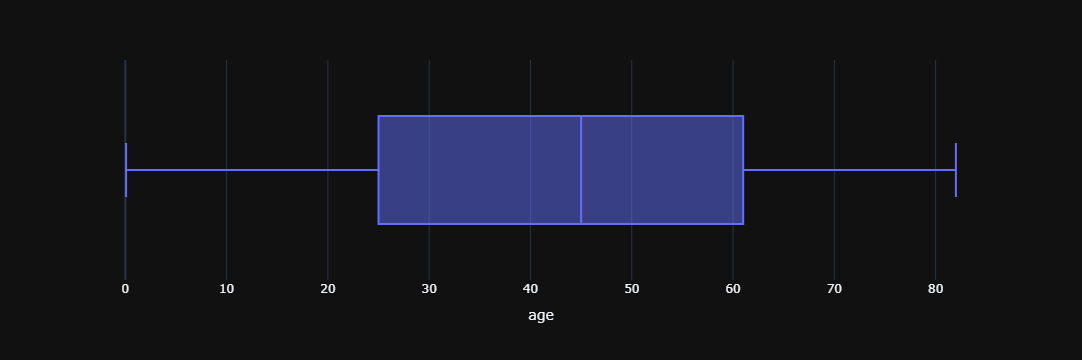

In [12]:
fig = px.box(data_frame = df,
            x = "age",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Box Plot of *avg_glucose_level* <a id="6"></a>

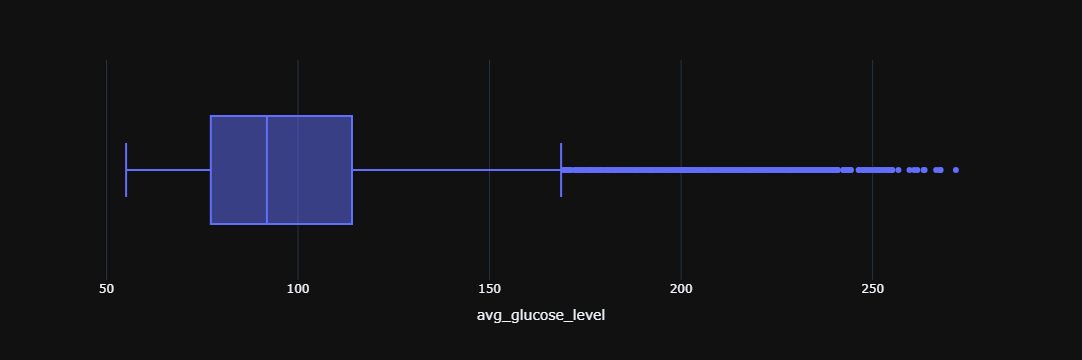

In [13]:
fig = px.box(data_frame = df,
            x = "avg_glucose_level",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Box Plot of *bmi* <a id="7"></a>

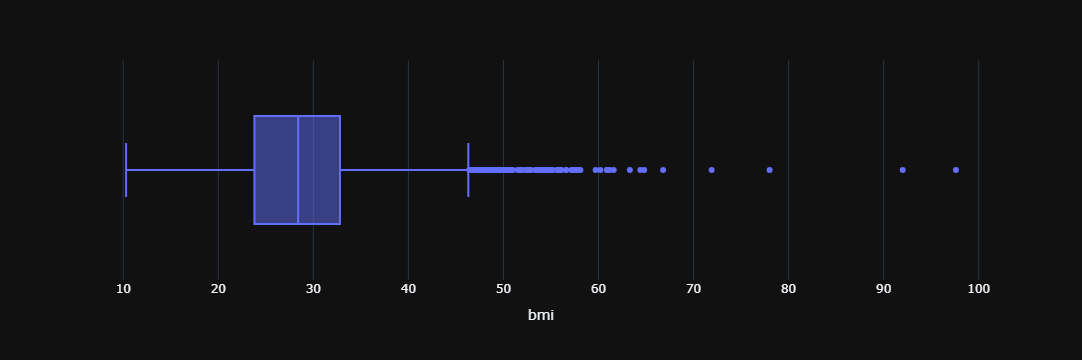

In [14]:
fig = px.box(data_frame = df,
            x = "bmi",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Distribution Plot of *age* <a id="8"></a>

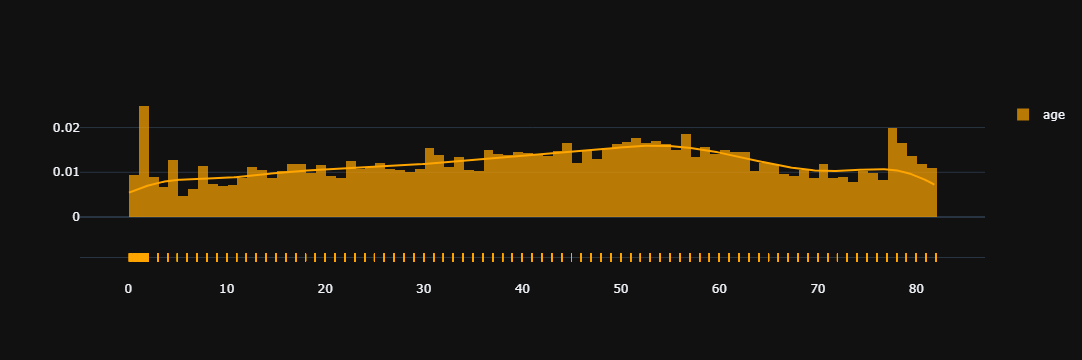

In [15]:
age = list(df['age'].values)

hist_data = [age]
group_labels = ['age']
colors = ['Orange']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Distribution Plot of *avg_glucose_level* <a id="9"></a>

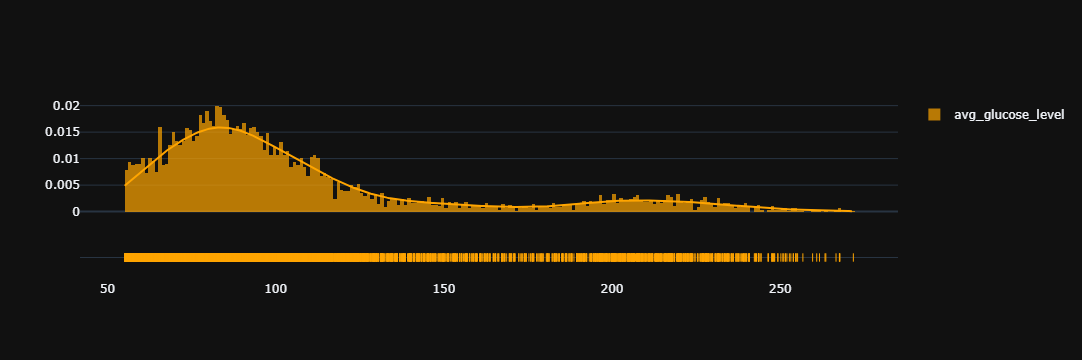

In [16]:
avg_glucose_level = list(df['avg_glucose_level'].values)
hist_data = [avg_glucose_level]
group_labels = ['avg_glucose_level']
colors = ['Orange']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

### Distribution Plot of *bmi* <a id="10"></a>

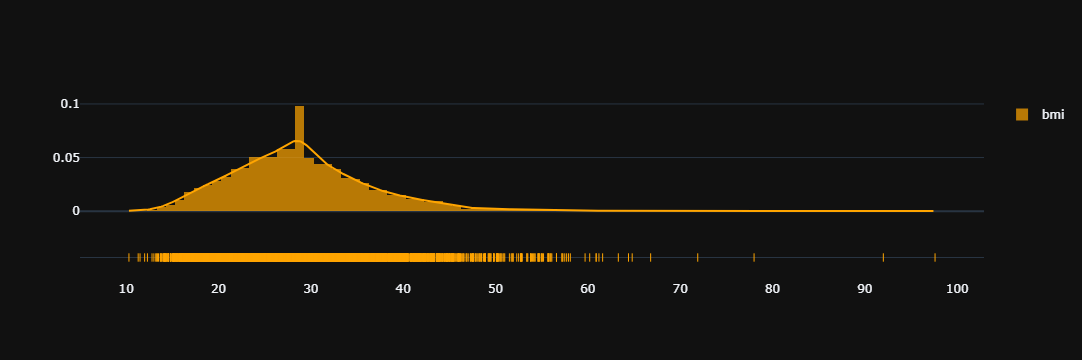

In [17]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Orange']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.update_layout({"template":"plotly_dark"})
fig.show()

# 4. Bivariate analysis <a id="11"></a>

**Just re-writing the arrays again**

In [18]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
cont_cols = ["age","avg_glucose_level","bmi"]

### Correlation plot of Continuous features <a id="12"></a>

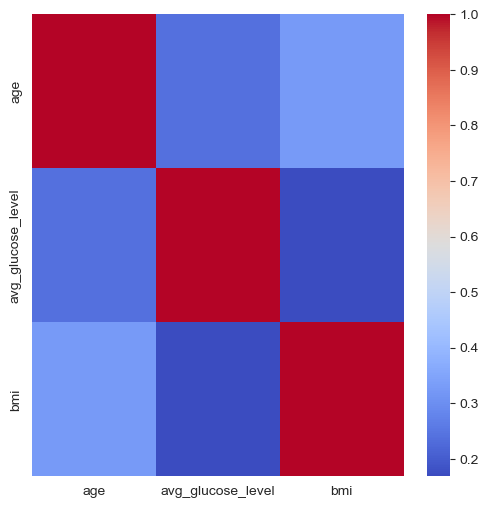

In [19]:
cr = df[cont_cols].corr(method='pearson')
plt.figure(figsize = (6,6))
sns.heatmap(cr,cmap="coolwarm")
plt.show()

### Scatter plot for *age vs avg_glucose_level* with a *Stroke* hue <a id="13"></a>

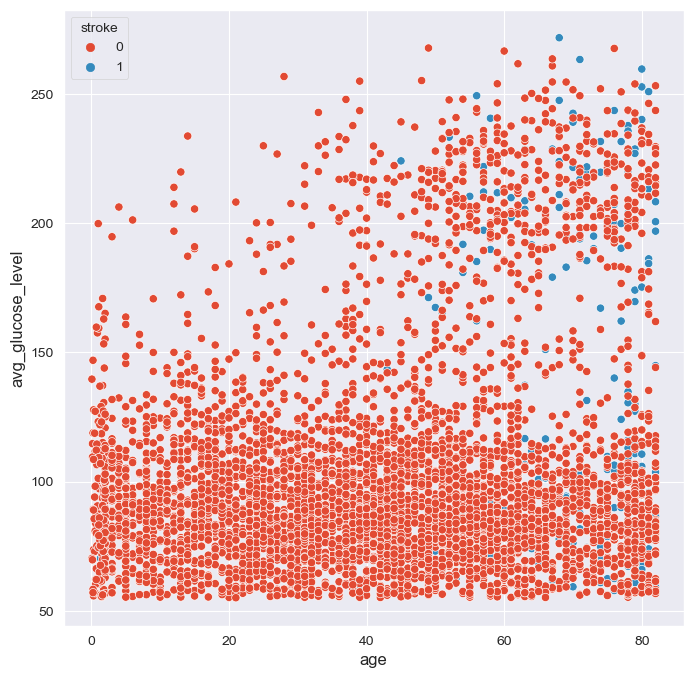

In [20]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'avg_glucose_level', hue='stroke')
plt.show()

### Scatter plot for *avg_glucose_level vs bmi* with a *Stroke* hue <a id="14"></a>

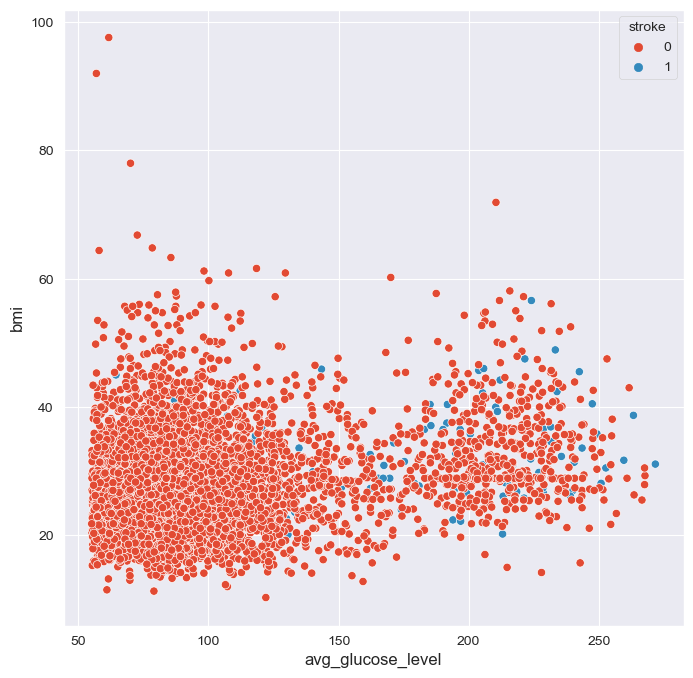

In [21]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'avg_glucose_level', y = 'bmi', hue='stroke')
plt.show()

### Scatter plot for *age vs bmi* with a *Stroke* hue <a id="15"></a>

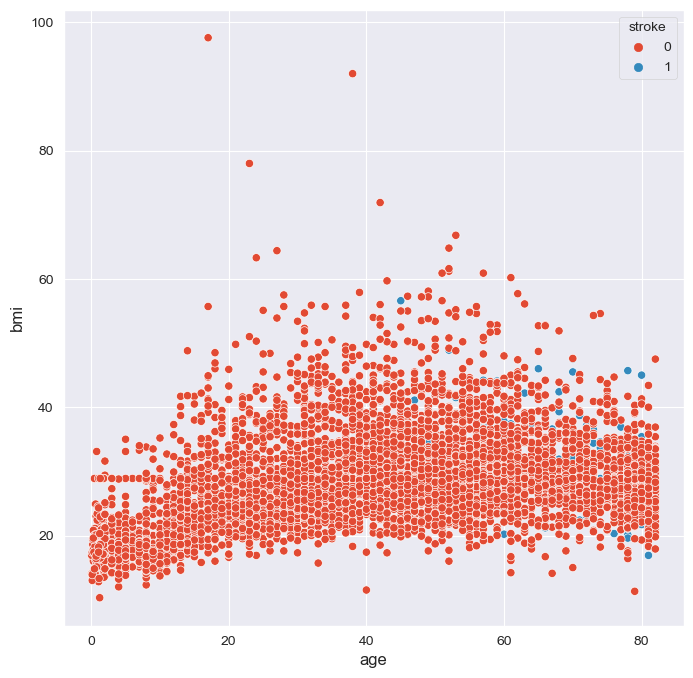

In [22]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue='stroke')
plt.show()

### Violin plot for continuous features <a id="16"></a>

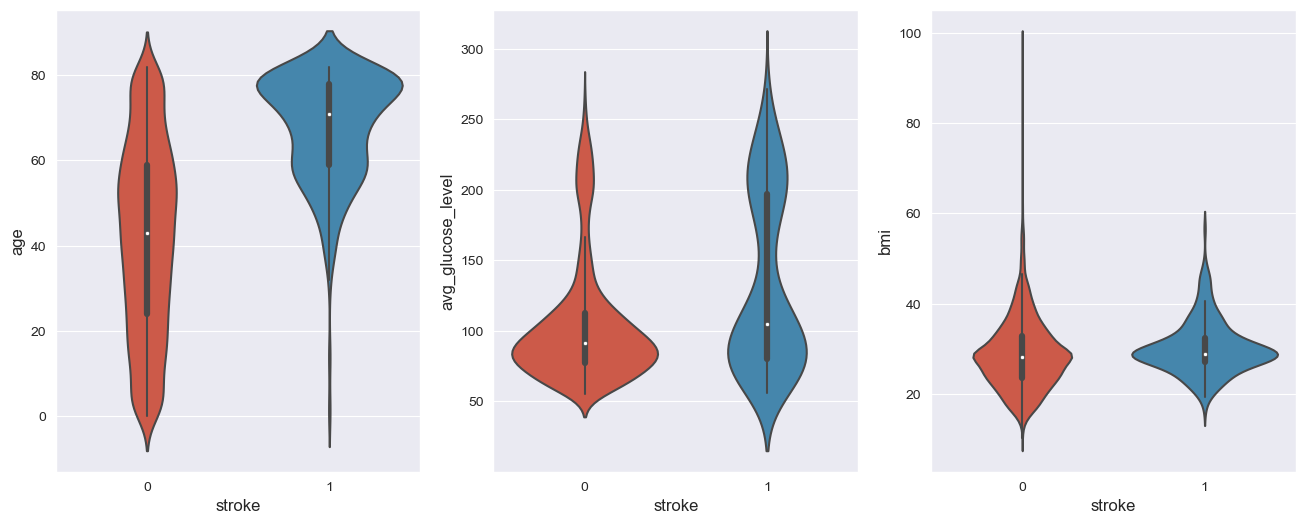

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'stroke', y = 'age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'stroke', y = 'bmi', data = df)
plt.show()

### Scatter-matrix of the dataset <a id="17"></a>

<Figure size 1600x1600 with 0 Axes>

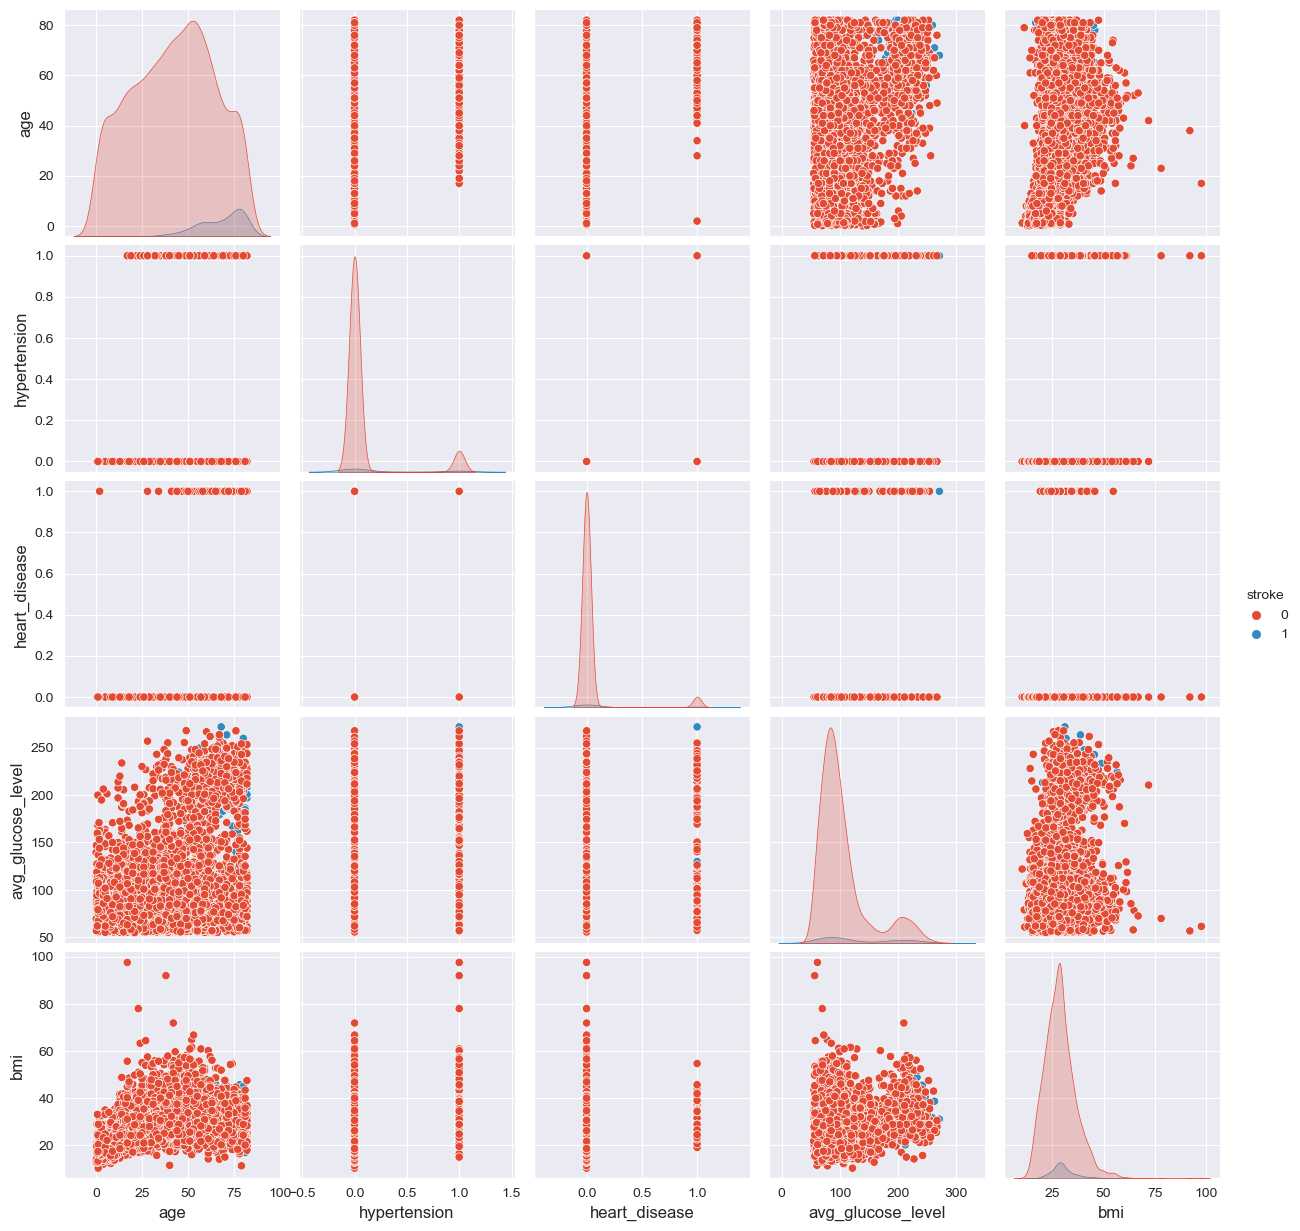

In [24]:
plt.figure(figsize = (16,16))
sns.pairplot(df,hue='stroke')
plt.show()

# 5. Data preprocessing <a id="18"></a>

**Conclusions from EDA**

- Gender feature has some very less number of *Other* gender so it can be removed.
- There are a lot of outliers in *avg_glucose_level* and *bmi*
- The outliers make the distribution curve of both the features highly skewed towards right
- Either the outliers can be removed or the distribution curve can be made less-skewed by mapping the values with a log but both cases will lead to loss of the number of datapoints with *Stroke = 1*
- *avg_glucose_level* increases with *age* and similarly leads to more chances of stroke
- The stroke class is highly imbalanced which has to be taken of

### Removing the other from *gender* <a id="19"></a>

In [25]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [26]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

### Checking the effect of outliers on the reduction of dataset <a id="20"></a>

In [27]:
print("The number of people who don't have stroke : ", df['stroke'].value_counts()[0])
print("The number of people who don't have stroke : ", df['stroke'].value_counts()[1])
cond1 = df['avg_glucose_level'] > 170
cond2 = df['stroke'] == 1
print("The number of outliers in avg_glucose_level with stroke = 1 are : ", df[cond1 & cond2].shape)
cond3 = df['bmi'] > 47
cond4 = df['stroke'] == 1
print("The number of outliers in bmi with stroke = 1 are : ", df[cond3 & cond4].shape)

The number of people who don't have stroke :  4860
The number of people who don't have stroke :  249
The number of outliers in avg_glucose_level with stroke = 1 are :  (83, 11)
The number of outliers in bmi with stroke = 1 are :  (3, 11)


**There are 83 outliers in the *avg_glucose_level* which have a *stroke=1* which comprises of a large quantity of data. Removing them will lead to loss of data. I'll rather remove the outliers in *bmi* because the number of outliers with stroke are just 3 which won't effect the dataset much.**

### Removing the outliers in *bmi* <a id="21"></a>

In [28]:
print("The shape before removing the BMI outliers : ",df.shape)
df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5109, 11)
The shape after removing the BMI outliers :  (4992, 11)


### Checking the distribution of *bmi* again which should have been made less skewed now <a id="22"></a>

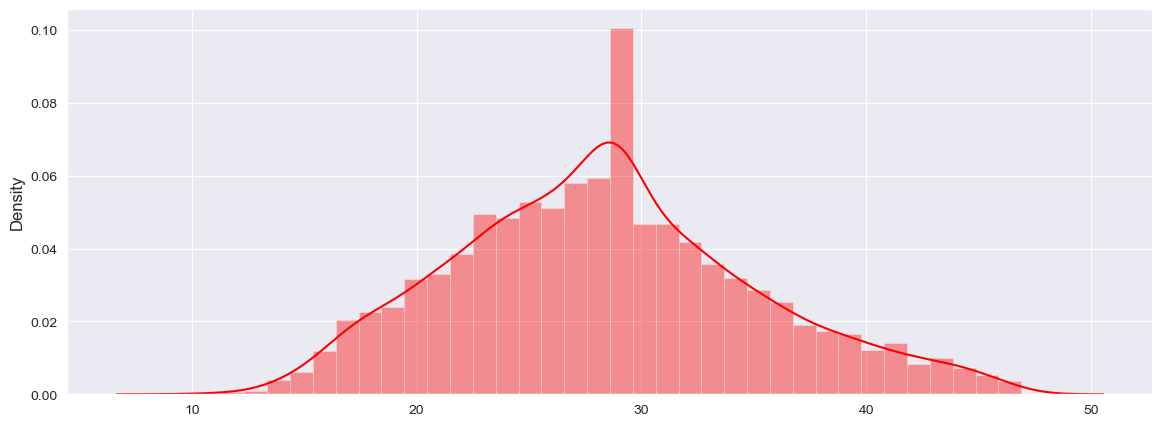

In [29]:
plt.figure(figsize = (14,5))
sns.distplot(x=df['bmi'],color='red')
plt.show()

### Handling data imbalance <a id="23"></a>

**Now since the stroke is highly imbalanced, the 2 ways to deal with it are :**
- **the majority class can either be undersampled using Tomek Links**
- **the minority class can be oversampled using SMOTE**

**I'll be using SMOTE for this. For using SMOTE, all the cateogrial variables must be converted into int. I'll be Label Encoding all of them because later I'll make a *PyTorch* model using *Embeddings*, and that's why I won't be One-Hot-Encoding them.**

In [30]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [31]:
# Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

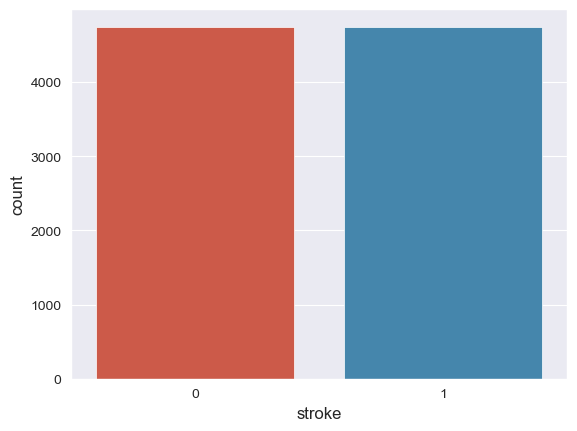

In [32]:
# Using SMOTE
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

**It's quite clear that the data has been completely balanced.**

In [33]:
# Joining back dataset
df = pd.concat([X,y],axis = 1)
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

In [34]:
# shuffling the dataset before model development
df = df.sample(frac = 1)

# 6. PyTorch Model Development <a id="24"></a>

### Seperate categorical from continuous <a id="25"></a>

In [35]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]
cont_cols = ["age","avg_glucose_level","bmi"]
y_col = ["stroke"]

### Categorify <a id="26"></a>

In [36]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [37]:
df.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

### Stacking the columns for the embeddings <a id="27"></a>

In [38]:
# stacking the categorical columns
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)
cats[:5]

array([[0, 0, 0, 1, 2, 1, 1],
       [1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 2, 1, 0],
       [0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 0]], dtype=int8)

In [39]:
# converting the stack into tensor
cats = torch.tensor(cats, dtype = torch.int64)
cats[:5]

tensor([[0, 0, 0, 1, 2, 1, 1],
        [1, 0, 0, 1, 0, 1, 0],
        [1, 0, 0, 1, 2, 1, 0],
        [0, 0, 0, 1, 0, 1, 1],
        [1, 0, 0, 1, 1, 1, 0]])

In [40]:
# stacking the continuous columns & converting to tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 32.0000,  91.3400,  25.5000],
        [ 61.4780,  72.8810,  28.8392],
        [ 77.7972, 218.6513,  26.7324],
        [ 51.0000,  95.1600,  42.7000],
        [ 57.8935,  72.0221,  28.7662]])

In [41]:
# converting target variable to tensor and flattening since CrossEntropyLoss expects a 1-d tensor
y = torch.tensor(df[y_col].values).flatten()
y[:5]

tensor([0, 1, 1, 0, 1])

In [42]:
print(cats.shape)
print(conts.shape)
print(y.shape)

torch.Size([9492, 7])
torch.Size([9492, 3])
torch.Size([9492])


### Setting an embedding size <a id="28"></a>

In [43]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(2, 1), (2, 1), (2, 1), (2, 1), (5, 3), (2, 1), (4, 2)]

### Defining the tabular model <a id="29"></a>

In [44]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [45]:
torch.manual_seed(42)
model = TabularModel(emb_szs, conts.shape[1], 2, [400,200,100], p=0.2)
model

TabularModel(
  (embeds): ModuleList(
    (0-3): 4 x Embedding(2, 1)
    (4): Embedding(5, 3)
    (5): Embedding(2, 1)
    (6): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.2, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=400, out_features=200, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=200, out_features=100, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=100, 

### Defining loss function and optimizer <a id="30"></a>

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Performing train/test split <a id="31"></a>

In [47]:
batch_size = 9000
test_size = 492

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [48]:
print(len(cat_train))
print(len(cat_test))

8508
492


### Training the model <a id="32"></a>

In [49]:
import time
start_time = time.time()

epochs = 320
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 
print(f'\nDuration: {time.time() - start_time:.0f} seconds') 

epoch:   1  loss: 0.78573656
epoch:  26  loss: 0.39003584
epoch:  51  loss: 0.36732325
epoch:  76  loss: 0.35084152
epoch: 101  loss: 0.34068274
epoch: 126  loss: 0.32794040
epoch: 151  loss: 0.31499490
epoch: 176  loss: 0.31786954
epoch: 201  loss: 0.30298808
epoch: 226  loss: 0.29240409
epoch: 251  loss: 0.28290507
epoch: 276  loss: 0.26920086
epoch: 301  loss: 0.26513359
epoch: 320  loss: 0.26412067

Duration: 41 seconds


### Plotting the loss function <a id="33"></a>

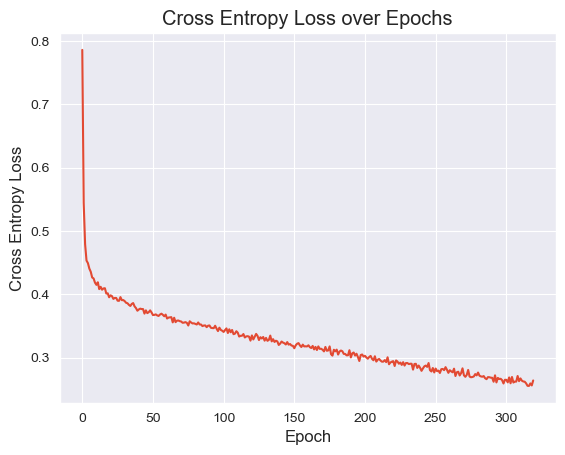

In [52]:
# Detach the tensors from the computational graph and convert them to floats
losses_np = [loss.detach().numpy().item() for loss in losses]

# Plot the loss values
plt.plot(range(epochs), losses_np)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Cross Entropy Loss over Epochs')
plt.show()

### Model Validation <a id="34"></a>

In [53]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32379773


In [54]:
rows = 200
correct = 0
groundTruth = []
predictedValues = []
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    predictedValues.append(y_val[i].argmax().item())
    groundTruth.append(y_test[i])
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([0.3060, 0.8758])      1      1   
tensor([ 1.4615, -2.1079])    0      0   
tensor([0.2394, 0.8360])      1      1   
tensor([-1.2492,  1.4563])    1      1   
tensor([0.8831, 0.8267])      0      0   
tensor([-1.1056,  2.4390])    1      1   
tensor([ 0.6707, -0.3457])    0      0   
tensor([ 5.6825, -4.5102])    0      0   
tensor([ 4.6953, -5.9967])    0      0   
tensor([ 2.5088, -2.6046])    0      0   
tensor([-5.6088,  6.2963])    1      1   
tensor([-2.5440,  3.5216])    1      1   
tensor([-0.5318,  0.5580])    1      1   
tensor([ 2.9496, -5.3114])    0      0   
tensor([-0.8205,  0.5972])    1      1   
tensor([ 3.1325, -4.3257])    0      0   
tensor([-1.9339,  0.7344])    1      1   
tensor([ 4.4475, -9.3877])    0      0   
tensor([-2.7618,  2.0511])    1      1   
tensor([-1.7565,  1.3111])    1      1   
tensor([-2.0585,  1.7828])    1      1   
tensor([-2.1374,  0.1704])    1      1   
tensor([0.1529, 1.0646])      1   

In [55]:
from sklearn.metrics import f1_score
print("The F1-score is :", f1_score(groundTruth, predictedValues))

The F1-score is : 0.8828828828828829
